In [1]:
import json 
import pandas as pd
from tqdm import tqdm

In [2]:
recs = []
with open('../../data/mave_attr_extract/MAVE/labels/mave_positives_labels_sample.jsonl', 'r') as f:
    for l in tqdm(f):
        recs.append(json.loads(l))
        if len(recs) <0:
            break 
df_pos_sample = pd.DataFrame(recs)

20it [00:00, 25606.25it/s]


In [2]:
recs = []
with open('../../data/mave_attr_extract/mave_positives.jsonl', 'r') as f:
    for l in tqdm(f):
        recs.append(json.loads(l))
        if len(recs) <0:
            break 
df_pos = pd.DataFrame(recs)

recs = []
with open('../../data/mave_attr_extract/mave_negatives.jsonl', 'r') as f:
    for l in tqdm(f):
        recs.append(json.loads(l))
        if len(recs) <0:
            break 
df_neg = pd.DataFrame(recs)


2226509it [01:37, 22914.21it/s]
1248009it [00:43, 28999.02it/s]


In [4]:
len(df_pos), len(df_neg)

(2226509, 1248009)

In [9]:
df_neg[df_neg.category == 'Dresses'].sample(2).to_dict('records')

[{'id': 'B016ISOZQC',
  'category': 'Dresses',
  'paragraphs': [{'text': "Taylor Dresses Women's High Low Lace Shirt Dress",
    'source': 'title'},
   {'text': 'Taylor navy lace shirt dress. Button down front with long sleeves and a high low bottom hem.',
    'source': 'description'},
   {'text': '50% Cotton, 50% Nylon; Combo: 100% Polyester',
    'source': 'feature'},
   {'text': 'Imported', 'source': 'feature'},
   {'text': 'Hand Wash', 'source': 'feature'},
   {'text': 'Great for a date or dinner with friend', 'source': 'feature'},
   {'text': 'Wear from desk to dinner', 'source': 'feature'},
   {'text': 'Package Dimensions: 17.8 x 7.3 x 4.8 inches',
    'source': 'feature'},
   {'text': 'Shipping Weight: 1.1 pounds', 'source': 'feature'},
   {'text': 'ASIN: B016ISOZQC', 'source': 'feature'},
   {'text': 'Item model number: 7009M', 'source': 'feature'},
   {'text': 'Date first listed on Amazon: December 14, 2015',
    'source': 'feature'},
   {'text': 'Average Customer Review: 5.0 

In [6]:
df_neg[df_neg.category == 'Dresses']

,id,category,paragraphs,attributes
3,6319781610,Dresses,[{'text': 'Alion Women Classic Sexy Plunge V-N...,"[{'key': 'Sleeve Style', 'evidences': []}]"
23,9985445953,Dresses,[{'text': 'YONGM Women High Waisted Leisure Co...,"[{'key': 'Sleeve Style', 'evidences': []}]"
451,B0002MM91O,Dresses,[{'text': 'Sandra Darren Women's Short Sleeve ...,"[{'key': 'Pattern', 'evidences': []}]"
452,B0002MNYHC,Dresses,[{'text': 'Sandra Darren Women's Short-Sleeve ...,"[{'key': 'Pattern', 'evidences': []}]"
516,B0002V34RI,Dresses,[{'text': 'Japanese Weekend Women's Maternity ...,"[{'key': 'Neckline', 'evidences': []}]"
...,...,...,...,...
835511,B01H0H91FU,Dresses,"[{'text': 'prAna Amelie Dress', 'source': 'tit...","[{'key': 'Length', 'evidences': []}]"
835604,B01H2JU1J6,Dresses,"[{'text': 'Royal Robbins Women's Flynn Dress',...","[{'key': 'Length', 'evidences': []}]"
835610,B01H2OHZ9K,Dresses,"[{'text': 'Royal Robbins Women's Noe Dress', '...","[{'key': 'Pattern', 'evidences': []}]"
1040778,B00JDBIX4W,Dresses,[{'text': 'Girl's Summer Wear Peppa Pig Lace D...,"[{'key': 'Shoulder Style', 'evidences': []}]"


In [5]:
df_pos['attr_vals'] = df_pos['attributes'].apply(lambda x: [(i['key'].strip().lower(), j['value'].strip().lower()) for i in x for j in i['evidences']])

In [6]:
df_neg['attr_vals'] = df_neg['attributes'].apply(lambda x: [(i['key'].strip().lower(),j.strip().lower()) for i in x for j in (i['evidences'] + [""])])

In [7]:
from collections import defaultdict

In [8]:
cat_attr_val_cnt_pos = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

In [9]:
for i in df_pos.to_dict('records'):
    for j in i['attr_vals']:
        cat_attr_val_cnt_pos[i['category'].lower().strip()][j[0]][j[1]] += 1

In [10]:
cat_attr_val_cnt_neg = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

In [11]:
for i in df_neg.to_dict('records'):
    for j in i['attr_vals']:
        cat_attr_val_cnt_neg[i['category'].lower().strip()][j[0]][j[1]] += 1

In [12]:
len(set([(i,) for i in cat_attr_val_cnt_pos for j in cat_attr_val_cnt_pos[i] for k in cat_attr_val_cnt_pos[i][j]]))

1257

In [13]:
len(set([(j,) for i in cat_attr_val_cnt_pos for j in cat_attr_val_cnt_pos[i] for k in cat_attr_val_cnt_pos[i][j]]))

705

In [14]:
len(set([(i,j) for i in cat_attr_val_cnt_pos for j in cat_attr_val_cnt_pos[i] for k in cat_attr_val_cnt_pos[i][j]]))

2535

In [15]:
len(set([(i,j,k) for i in cat_attr_val_cnt_pos for j in cat_attr_val_cnt_pos[i] for k in cat_attr_val_cnt_pos[i][j]]))

97627

In [16]:
len(set([(i,) for i in cat_attr_val_cnt_neg for j in cat_attr_val_cnt_neg[i] for k in cat_attr_val_cnt_neg[i][j]]))

1114

In [17]:
len(set([(j,) for i in cat_attr_val_cnt_neg for j in cat_attr_val_cnt_neg[i] for k in cat_attr_val_cnt_neg[i][j]]))

693

In [18]:
len(set([(i,j) for i in cat_attr_val_cnt_neg for j in cat_attr_val_cnt_neg[i] for k in cat_attr_val_cnt_neg[i][j]]))

2305

In [19]:
len(set([(i,j,k) for i in cat_attr_val_cnt_neg for j in cat_attr_val_cnt_neg[i] for k in cat_attr_val_cnt_neg[i][j]]))

2305

In [20]:
from thefuzz import process as fuzz_process

In [21]:
similar_vals_mapper = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(list))))

In [22]:
match_errors = []
match_success = []
match_sources = []
recs = []
for i in tqdm(df_pos.to_dict('records')):
    has_error = False
    for a in i['attributes']:
        for v in a['evidences']:
            qa_model_extracted_text = i['paragraphs'][v['pid']]['text'][v['begin']: v['end']]
            normalized_value = v['value']
            match_sources.append((i['id'], i['category'], a['key'], v['value'], i['paragraphs'][v['pid']]['source'], normalized_value))
            if normalized_value != qa_model_extracted_text:
                match_errors.append((i['id'], i['category'], a['key'], v['pid'], normalized_value, qa_model_extracted_text))
                has_error = True
            else:
                match_success.append((i['id'], i['category'], a['key'], v['pid'], normalized_value, qa_model_extracted_text))
    if not has_error:
        recs.append(i)
df_pos_correct = pd.DataFrame(recs)

100%|██████████| 2226509/2226509 [00:21<00:00, 104982.07it/s]


In [23]:
len(match_errors), len(match_success)

(564, 8630742)

In [24]:
len(match_errors) / (len(match_success) + len(match_errors))

6.534352970454298e-05

In [25]:
len(df_pos_correct) / len(df_pos)

0.9999505953041286

In [26]:
match_sources[:10]

[('6342506256',
  'Shorts',
  'Pattern',
  'Camo Cargo Shorts',
  'title',
  'Camo Cargo Shorts'),
 ('6342509379', 'Pants', 'Fit', 'Loose Pants', 'title', 'Loose Pants'),
 ('6342522898', 'Dresses', 'Length', 'Mini', 'title', 'Mini'),
 ('6319781610', 'Dresses', 'Neckline', 'V-Neck', 'title', 'V-Neck'),
 ('6342502943', 'Pants', 'Fit', 'Loose', 'title', 'Loose'),
 ('6342502943', 'Pants', 'Fit', 'loose', 'description', 'loose'),
 ('6342502943', 'Pants', 'Fit', 'loose', 'description', 'loose'),
 ('6342502943', 'Pants', 'Fit', 'Loose', 'feature', 'Loose'),
 ('6318962387', 'Pants', 'Rise', 'Mid Rise', 'title', 'Mid Rise'),
 ('6318962387',
  'Pants',
  'Fit',
  'Skinny Stretch Tights Pencil Pants',
  'title',
  'Skinny Stretch Tights Pencil Pants')]

In [27]:
from collections import Counter
Counter(i[-2] for i in match_sources)

Counter({'title': 2869157,
         'description': 3625166,
         'feature': 2024606,
         'brand': 112279,
         'price': 98})

In [28]:
df_match_sources = pd.DataFrame(match_sources, columns=['id', 'cat', 'attr', 'val', 'source', 'evidence'])

In [29]:
tmp = df_match_sources.groupby('id').agg({
    'source': lambda x: [i for i in x],
    'val': lambda x: [i for i in x]
}).reset_index()

In [30]:
recs = []
for i in tqdm(tmp.to_dict('records')):
    uniq_vals = {}
    needed_s_v = []
    for ind, (s, v) in enumerate(zip(i['source'], i['val'])):
        v = v.lower().strip()
        if v not in uniq_vals:
            needed_s_v.append((ind, s, v))
            uniq_vals[v] = 1
    i['needed_source_value'] = needed_s_v
    recs.append(i)
tmp2 = pd.DataFrame(recs)

100%|██████████| 2226509/2226509 [00:12<00:00, 171791.93it/s]


In [31]:
tmp2['needed_source'] = tmp2.needed_source_value.apply(lambda x: tuple(set([i[1] for i in x])))

In [32]:
tmp2

,id,source,val,needed_source_value,needed_source
0,0000031860,"[title, title]","[Ballet, Tutu]","[(0, title, ballet), (1, title, tutu)]","(title,)"
1,0000031887,"[title, title]","[Tutu, Ballet]","[(0, title, tutu), (1, title, ballet)]","(title,)"
2,0000031895,"[title, description, title, description]","[Ballet, tutu, Tutu, tutu]","[(0, title, ballet), (1, description, tutu)]","(description, title)"
3,0000031909,"[title, description, feature, title, descripti...","[Ballet, ballet, Tutu, Tutu, tutu, Tutu]","[(0, title, ballet), (2, feature, tutu)]","(feature, title)"
4,0000032034,"[title, title]","[Ballet, Tutu]","[(0, title, ballet), (1, title, tutu)]","(title,)"
...,...,...,...,...,...
2226504,B01HJH8JBI,[title],[Oxford],"[(0, title, oxford)]","(title,)"
2226505,B01HJHA4W0,"[title, title, description, feature, feature, ...","[Sandal, Wedge, wedge heel, wedge, wedge heel,...","[(0, title, sandal), (1, title, wedge), (2, de...","(description, title)"
2226506,B01HJHND96,[title],[Tank Top],"[(0, title, tank top)]","(title,)"
2226507,B01HJHR2PM,"[title, description, title, description, featu...","[Marker, Marker, 12 Colors, 12 colors, 12 colo...","[(0, title, marker), (2, title, 12 colors), (5...","(title,)"


In [33]:
tmp = Counter(tmp2['needed_source'])

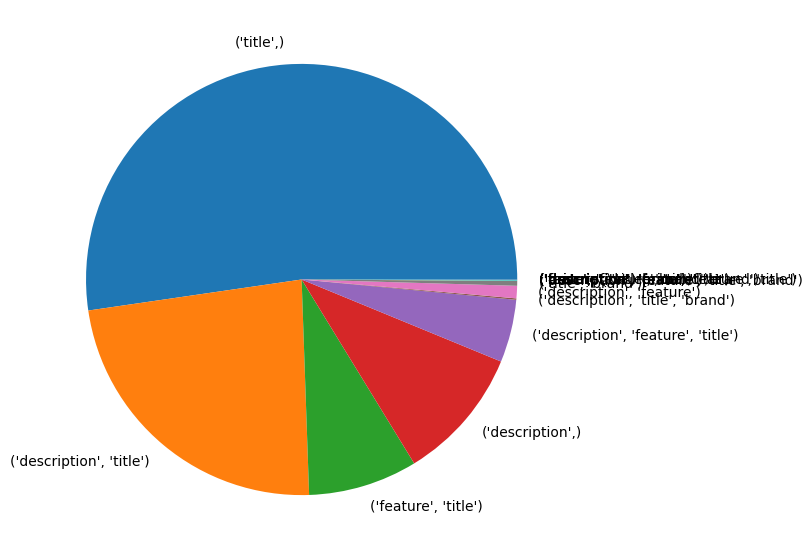

In [34]:
from matplotlib import pyplot as plt
import numpy as np
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(list(tmp.values()), labels = list(tmp.keys()))
 
# show plot
plt.show()


In [35]:
tmp = tmp2[tmp2.needed_source != ('title',)]
tmp['title_ratio'] = tmp['needed_source_value'].apply(lambda x: np.mean([i[1] == 'title' for i in x]))

/tmp/ipykernel_11733/2104020269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['title_ratio'] = tmp['needed_source_value'].apply(lambda x: np.mean([i[1] == 'title' for i in x]))


(array([245127.,   4216.,  42213., 118801.,  22471., 442373.,  16743.,
        135779.,  26785.,   7526.]),
 array([0.        , 0.08888889, 0.17777778, 0.26666667, 0.35555556,
        0.44444444, 0.53333333, 0.62222222, 0.71111111, 0.8       ,
        0.88888889]),
 <BarContainer object of 10 artists>)

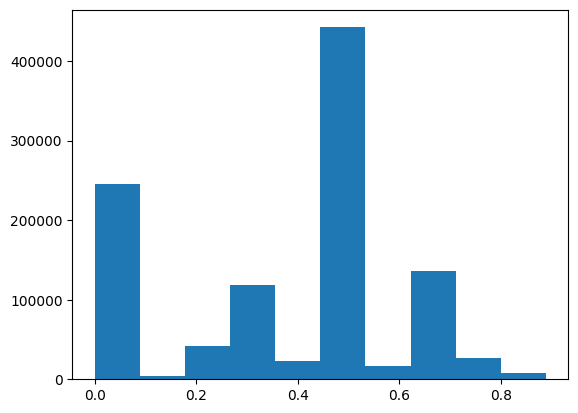

In [36]:
plt.hist(tmp.title_ratio)

In [37]:
tmp2['title_ratio'] = tmp2['needed_source_value'].apply(lambda x: np.mean([i[1] == 'title' for i in x]))

In [38]:
df_pos_correct = tmp2[['id', 'needed_source_value', 'title_ratio']].merge(df_pos_correct, on='id', how='inner')

In [39]:
df_pos_correct_title = df_pos_correct[df_pos_correct.title_ratio >= 0.5]

In [40]:
df_pos_correct_title['title'] = df_pos_correct_title['paragraphs'].apply(lambda x: x[0]['text'] if x[0]['source'] == 'title' else None)

/tmp/ipykernel_11733/3743341173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos_correct_title['title'] = df_pos_correct_title['paragraphs'].apply(lambda x: x[0]['text'] if x[0]['source'] == 'title' else None)


In [41]:
df_pos_correct_title.sample(2).to_dict('records')

[{'id': 'B00HF1G2UY',
  'needed_source_value': [(0, 'title', 'kitchen')],
  'title_ratio': 1.0,
  'category': 'Faucets',
  'paragraphs': [{'text': 'KES Lead-Free Brass Pull Down Kitchen Faucet with Swivel Spout Single Handle High Arc Spring Brushed Nickel, L6907LF-2',
    'source': 'title'},
   {'text': "SPECIFICATIONS -Body Material : Lead-Free Brass (less than 0.25% lead content) -Handle Material : Zinc Alloy -Sprayer Material : Engineering Grade Plastic (ABS) -Cartridge : Ceramic Disc Cartridge -Finish : Brushed Nickel -Hose : 24-Inch (60 CM), US Standard 9/16-24 UNEF threaded -Hole Count : One -Handle Count : One -Installation Method : Deck-Mounted Package Includes Faucet 24-Inch (60 CM) Hot & Cold Supply Hoses, US Standard 9/16-24 UNEF threaded Mounting Hardware Buy from KES Reliable Ceramic Cartridge The ceramic disc cartridge can survive 500,000 times open & close test. Sophisticated ceramic engineering provides both convenience and control precision. 100% Pressure Tested Each f

In [42]:
recs = []
for i in tqdm(df_pos_correct_title.to_dict('records')):
    title_attributes = {a['key']: [j for j in a['evidences'] if i['paragraphs'][j['pid']]['source'] == 'title'] for a in i['attributes']}
    title_attributes = {j: title_attributes[j] for j in title_attributes if len(title_attributes[j]) > 0}
    i['title_attributes'] = title_attributes
    recs.append(i)

100%|██████████| 1793162/1793162 [00:09<00:00, 192739.41it/s]


In [43]:
df_pos_correct_title = pd.DataFrame(recs)

In [47]:
df_pos_correct_title_simple = df_pos_correct_title[['id', 'title', 'category', 'title_attributes']].drop_duplicates('title')

In [185]:
df_pos_correct_title_simple[df_pos_correct_title_simple.title.apply(lambda x: '](' in x)]

,id,title,category,title_attributes
109839,B000PQKG62,"MacBook Black 13"" Inch / 2008 / 2.4GHz Intel ""...",Laptops,"{'Screen Size': [{'value': '13""', 'pid': 0, 'b..."
227244,B002AQUHRS,Microflex Midknight MK-296 Black XL Nitrile Po...,Disposable Gloves,"{'Material': [{'value': 'Nitrile', 'pid': 0, '..."
460736,B0067XWVUG,High Performance Battery Replacement for Sony ...,Laptop Batteries,"{'Capacity': [{'value': '8800mah', 'pid': 0, '..."
692824,B00C33VW3Q,Sony Playstation Vita Screen Protector + Back ...,Screen Protectors,"{'Device Type': [{'value': 'Playstation', 'pid..."
698473,B00C7XGKBG,"Apple iPad 3 Screen Protector [2-Pack](Wi-Fi),...",Screen Protectors,"{'Device Type': [{'value': 'iPad', 'pid': 0, '..."
698475,B00C7XGQVK,Apple iPad 4 Screen Protector [2-Pack](w/Retin...,Screen Protectors,"{'Device Type': [{'value': 'iPad', 'pid': 0, '..."
703116,B00CBMT2FE,Apple iPad 2 Screen Protector [2-Pack](Wi-Fi V...,Screen Protectors,"{'Device Type': [{'value': 'iPad', 'pid': 0, '..."
703125,B00CBMVHQ6,Sony Playstation Vita Screen Protector (PS Vit...,Screen Protectors,"{'Device Type': [{'value': 'Playstation', 'pid..."
716852,B00CM5DA62,Transformers Platinum Edition Predaking Figure...,Action & Toy Figures,"{'Type': [{'value': 'Transformers', 'pid': 0, ..."
739040,B00D6WGJB8,ASUS Padfone Infinity Screen Protector [2-Pack...,Screen Protectors,"{'Device Type': [{'value': 'Tablet', 'pid': 0,..."


In [186]:
len(df_pos_correct_title_simple) / len(df_pos)

0.7709679143448331

In [198]:
recs = []
tmp = df_pos_correct_title_simple.to_dict('records')

for i in tqdm(tmp):
    t_i = i['title'].replace('[', " ").replace(']', " ").replace('(', " ").replace(')', " ")
    if '->' in t_i:
        continue
    t_o = t_i
    attr_val_evi_dicts = [({**k, **{'attribute': j}}) for j in i['title_attributes'] for k in i['title_attributes'][j]]
    begin_ends = {}
    inds = []
    discard_sample = False
    for ind, d in enumerate(attr_val_evi_dicts):
        b_, e_ = d['begin'], d['end']
        if len(begin_ends) == 0:
            begin_ends[(b_, e_)] = 1
            inds.append(ind)
        else:
            not_intersect = True
            for (b, e) in begin_ends:
                if b_ <= b < e_ or b_ < e <= e_ or b <= b_ < e or b < e_ <= e:
                    # print((b, e), 'intersects', (b_, e_), i, 'discarded')
                    discard_sample = True 
                    break
            begin_ends[(b_, e_)] = 1
        if discard_sample:
            break 
    if discard_sample:
        # print('-' * 20)
        continue
        
    for d in sorted(attr_val_evi_dicts, key=lambda x: -x['end']):
        t_o = t_o[:d['begin']] + '['+ t_o[d['begin']:d['end']] + ']' + '(' + d['attribute'] + ')' + t_o[d['end']:]
    t_i_c = t_i.strip()
    t_o_c = t_o.strip()
    while True:
        t_i_c_ = t_i_c.replace("  ", " ")
        t_o_c_ = t_o_c.replace("  ", " ")
        if t_i_c_ == t_i_c and t_o_c_ == t_o_c:
            break
        else:
            t_i_c = t_i_c_ 
            t_o_c = t_o_c_
        
    i['text'] = t_i_c + " -> " + t_o_c
    recs.append(i)
df_pos_correct_title_simple_aug = pd.DataFrame(recs)

100%|██████████| 1716567/1716567 [00:18<00:00, 90410.32it/s]


In [199]:
len(df_pos_correct_title_simple_aug) / len(df_pos_correct_title_simple)

0.9093842535712268

In [218]:
df_pos_correct_title_simple_aug[['text']].sample(5).to_dict('records')

[{'text': 'KIP 7700 Z200970060 Toner Black, Bx/4 Original Genuine -> KIP 7700 Z200970060 [Toner](Type) Black, Bx/4 Original Genuine'},
 {'text': 'Epson Claria Ink Cartridge - Color - Inkjet -> Epson Claria Ink Cartridge - Color - [Inkjet](Type)'},
 {'text': "Billabong Men's Shifter Short Sleeve Knit Crew -> Billabong Men's Shifter [Short Sleeve](Sleeve Style) Knit Crew"},
 {'text': 'Waterproof Brown Sofa Protector 110"X70.5" -> Waterproof Brown [Sofa](Type) Protector 110"X70.5"'},
 {'text': 'NIKE Mens SB Portmore Ultralight Mesh Breathable Skate Shoes -> NIKE Mens SB Portmore Ultralight Mesh Breathable Skate [Shoes](Type)'}]

In [220]:
df_pos_correct_title_simple_aug = df_pos_correct_title_simple_aug.rename(columns={'category': 'category_flat'})

In [221]:
df_pos_correct_title_simple_aug

,id,title,category_flat,title_attributes,text
0,0000031860,Girls Ballet Tutu Neon Orange,"Dance Dresses, Skirts & Costumes","{'Dance Style': [{'value': 'Ballet', 'pid': 0,...",Girls Ballet Tutu Neon Orange -> Girls [Ballet...
1,0000031887,Mystiqueshapes Girls Ballet Tutu Neon Lime Green,"Dance Dresses, Skirts & Costumes","{'Type': [{'value': 'Tutu', 'pid': 0, 'begin':...",Mystiqueshapes Girls Ballet Tutu Neon Lime Gre...
2,0000031895,Girls Ballet Tutu Neon Blue,"Dance Dresses, Skirts & Costumes","{'Dance Style': [{'value': 'Ballet', 'pid': 0,...",Girls Ballet Tutu Neon Blue -> Girls [Ballet](...
3,0000031909,Mystiqueshapes Girls Ballet Tutu Neon Pink,"Dance Dresses, Skirts & Costumes","{'Dance Style': [{'value': 'Ballet', 'pid': 0,...",Mystiqueshapes Girls Ballet Tutu Neon Pink -> ...
4,0000032034,Adult Ballet Tutu Yellow,"Dance Dresses, Skirts & Costumes","{'Dance Style': [{'value': 'Ballet', 'pid': 0,...",Adult Ballet Tutu Yellow -> Adult [Ballet](Dan...
...,...,...,...,...,...
1561014,B01HJH8JBI,Deer Stags Men's Lohi Oxford,Shoes,"{'Silhouette': [{'value': 'Oxford', 'pid': 0, ...",Deer Stags Men's Lohi Oxford -> Deer Stags Men...
1561015,B01HJHA4W0,Soludos Women's Tall Espadrille Wedge Sandal,Shoes,"{'Type': [{'value': 'Sandal', 'pid': 0, 'begin...",Soludos Women's Tall Espadrille Wedge Sandal -...
1561016,B01HJHND96,House Greyjoy Game of Thrones Tank Top,Shirts & Tops,"{'Sleeve Style': [{'value': 'Tank Top', 'pid':...",House Greyjoy Game of Thrones Tank Top -> Hous...
1561017,B01HJHR2PM,Mural Art 12 Colors Waterproof Metal Glass Fin...,Markers & Highlighters,"{'Type': [{'value': 'Marker', 'pid': 0, 'begin...",Mural Art 12 Colors Waterproof Metal Glass Fin...


In [223]:
def remove_special_char(x):
    x = x.replace('[', " ").replace(']', " ").replace('(', " ").replace(')', " ")
    x = x.strip()
    while True:
        x_ = x.replace("  ", " ")
        if x == x_:
            return x 
        else:
            x = x_

In [227]:
df_neg_aug =  df_neg
df_neg_aug = df_neg_aug.rename(columns={'category': 'category_flat'})
df_neg_aug['title'] = df_neg_aug['paragraphs'].apply(lambda x: x[0]['text'] if x[0]['source'] == 'title' else None)
df_neg_aug = df_neg_aug[df_neg_aug.title.apply(lambda x: '->' not in x)]
tmp = df_neg_aug['title'].apply(remove_special_char)
df_neg_aug['text'] = tmp + " -> " + tmp
df_neg_aug['title_attributes'] = df_neg_aug['attributes'].apply(lambda x: {i['key']: [] for i in x})
df_neg_aug = df_neg_aug[['id', 'title', 'category_flat','title_attributes', 'text']]

In [230]:
len(df_neg_aug) / len(df_neg)

0.9999951923423629

In [231]:
len(df_pos_correct_title_simple_aug), len(df_neg_aug)

(1561019, 1248003)

In [232]:
df_pos_correct_title_simple_aug

,id,title,category_flat,title_attributes,text
0,0000031860,Girls Ballet Tutu Neon Orange,"Dance Dresses, Skirts & Costumes","{'Dance Style': [{'value': 'Ballet', 'pid': 0,...",Girls Ballet Tutu Neon Orange -> Girls [Ballet...
1,0000031887,Mystiqueshapes Girls Ballet Tutu Neon Lime Green,"Dance Dresses, Skirts & Costumes","{'Type': [{'value': 'Tutu', 'pid': 0, 'begin':...",Mystiqueshapes Girls Ballet Tutu Neon Lime Gre...
2,0000031895,Girls Ballet Tutu Neon Blue,"Dance Dresses, Skirts & Costumes","{'Dance Style': [{'value': 'Ballet', 'pid': 0,...",Girls Ballet Tutu Neon Blue -> Girls [Ballet](...
3,0000031909,Mystiqueshapes Girls Ballet Tutu Neon Pink,"Dance Dresses, Skirts & Costumes","{'Dance Style': [{'value': 'Ballet', 'pid': 0,...",Mystiqueshapes Girls Ballet Tutu Neon Pink -> ...
4,0000032034,Adult Ballet Tutu Yellow,"Dance Dresses, Skirts & Costumes","{'Dance Style': [{'value': 'Ballet', 'pid': 0,...",Adult Ballet Tutu Yellow -> Adult [Ballet](Dan...
...,...,...,...,...,...
1561014,B01HJH8JBI,Deer Stags Men's Lohi Oxford,Shoes,"{'Silhouette': [{'value': 'Oxford', 'pid': 0, ...",Deer Stags Men's Lohi Oxford -> Deer Stags Men...
1561015,B01HJHA4W0,Soludos Women's Tall Espadrille Wedge Sandal,Shoes,"{'Type': [{'value': 'Sandal', 'pid': 0, 'begin...",Soludos Women's Tall Espadrille Wedge Sandal -...
1561016,B01HJHND96,House Greyjoy Game of Thrones Tank Top,Shirts & Tops,"{'Sleeve Style': [{'value': 'Tank Top', 'pid':...",House Greyjoy Game of Thrones Tank Top -> Hous...
1561017,B01HJHR2PM,Mural Art 12 Colors Waterproof Metal Glass Fin...,Markers & Highlighters,"{'Type': [{'value': 'Marker', 'pid': 0, 'begin...",Mural Art 12 Colors Waterproof Metal Glass Fin...


: 